# Lab 1. Exploring and visualising data with Python
#### by Skuratovets P.R KN-222b.e

In [41]:
N = ord("P") % 3 + 1
f"Variant #{N}"

'Variant #3'

## Tips and Requirements

### General Tips
1. Use the `csv.reader()` function to read a CSV file.
2. Skip the first line (with column headers).
3. Do not use loops or other iterative constructs to process NumPy arrays. Use only slices and/or universal (vectorized) functions.
4. Create functions for tasks 3-7 of each option.

### Requirements for Plots
- Set the line type (dashed, dotted, etc.)
- Graphs must be labelled
- Add a legend
- Add a grid and specify the colour and type of lines
- Add a graph title, axis labels, and axis values
- Change the graph size (for example, 8x16 inches) and resolution (for example, 100 dpi)
- Save the graph as a PNG file

## Task 1
### Create a function, that takes filename and column name as a parameter and return a numpy array of a column values.

In [166]:
import csv
import numpy as np

def get_column_values(filename, column_name):
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        headers = next(reader)
        
        if column_name not in headers:
            raise ValueError(f"Column '{column_name}' not found in the CSV file.")
        
        column_index = headers.index(column_name)
        
        column_data = []
        for row in reader:
            if column_name == 'date':
                try:
                    value = np.datetime64(row[column_index])
                    column_data.append(value)
                except ValueError:
                    pass
            else:
                try:
                    value = int(row[column_index])
                    column_data.append(value)
                except ValueError:
                    pass
        

        return np.array(column_data, dtype='datetime64[D]' if column_name == 'date' else int)[::-1]

## Task 2
### Using function from task1, create a numpy array out of values of “APC” column.

In [194]:
filename = "russia_losses_equipment.csv"
column_name = "APC"
result = get_column_values(filename, column_name)
print(result)

[  516   706   706   816   846   862   900   939   945   985   999  1036
  1070  1105  1165  1205  1226  1249  1279  1375  1435  1448  1470  1487
  1535  1556  1578  1597  1625  1640  1664  1694  1710  1723  1735  1751
  1776  1830  1844  1858  1861  1891  1891  1895  1911  1923  1946  1964
  1968  1976  1982  2002  2041  2063  2087  2118  2162  2205  2238  2258
  2308  2342  2389  2418  2445  2471  2519  2567  2610  2651  2686  2713
  2741  2764  2808  2856  2873  2900  2934  2958  2974  3009  3043  3063
  3090  3116  3141  3166  3194  3213  3235  3246  3258  3270  3282  3302
  3343  3354  3366  3379  3392  3400  3416  3429  3438  3450  3466  3484
  3492  3503  3528  3545  3563  3573  3577  3588  3606  3614  3632  3637
  3645  3659  3687  3704  3720  3726  3736  3737  3744  3744  3772  3789
  3797  3811  3815  3823  3828  3829  3832  3832  3866  3874  3879  3886
  3892  3905  3912  3920  3929  3942  3950  3959  3971  3979  3987  3995
  4004  4011  4014  4022  4026  4032  4051  4055  4

## Task 3
### Find daily APC losses.

In [195]:
def get_daily_losses(result):
 return np.diff(result)

In [196]:
daily_apc_losses = get_daily_losses(result)
print("Daily APC losses:")
print(daily_apc_losses)

Daily APC losses:
[190   0 110  30  16  38  39   6  40  14  37  34  35  60  40  21  23  30
  96  60  13  22  17  48  21  22  19  28  15  24  30  16  13  12  16  25
  54  14  14   3  30   0   4  16  12  23  18   4   8   6  20  39  22  24
  31  44  43  33  20  50  34  47  29  27  26  48  48  43  41  35  27  28
  23  44  48  17  27  34  24  16  35  34  20  27  26  25  25  28  19  22
  11  12  12  12  20  41  11  12  13  13   8  16  13   9  12  16  18   8
  11  25  17  18  10   4  11  18   8  18   5   8  14  28  17  16   6  10
   1   7   0  28  17   8  14   4   8   5   1   3   0  34   8   5   7   6
  13   7   8   9  13   8   9  12   8   8   8   9   7   3   8   4   6  19
   4  15   6  10  14   8   7  11  15  11  10  17  16  17  12   6   8   5
   2   6   3   3  12  25  18  33  21  37  27  29  25  36  37  18   9  33
  23  22   3  17   8  11  17   2   4  24  28  20  11  25  25  24   8  20
  23  17  26  16  27  20  26  29  18  22  16  13  19 -14   5   7  14  12
  14  16  20   3   8  18  11  26 

## Task 4
### Find the 5 greatest daily losses of APC.

In [197]:
def get_top_daily_losses():
    
    return np.sort(daily_apc_losses)[-5:][::-1]


In [21]:
top_5_losses = get_top_daily_losses()
print("The 5 greatest daily losses of APC:",top_5_losses)

The 5 greatest daily losses of APC: [190 120 110  96  91]


## Task 5
### Determine how many APC were destroyed in the summer of 2024.

In [145]:
def apc_losses_summer_2024(filename, column_name):
    # Get dates and APC losses
    dates = get_column_values(filename, 'date')
    summer_start = np.datetime64('2024-06-01')
    summer_end = np.datetime64('2024-09-01')
    start_index, end_index = np.where(np.isin(dates, [summer_start,summer_end]))[0]
    total_losses = np.sum(daily_apc_losses[start_index:end_index])
    return total_losses

In [160]:
filename = 'russia_losses_equipment.csv'
column_name = 'APC'

summer_2024_losses = apc_losses_summer_2024(filename, column_name)
print(f"APCs destroyed in summer 2024: {summer_2024_losses}")

APCs destroyed in summer 2024: 1813


## Task 6
### Find the mean value of destroyed APC between 100 and 500 days of war.

In [200]:
def mean_apc_losses_100_500_days(selected_losses):
    return np.mean(selected_losses)

In [201]:
selected_losses = daily_apc_losses[99:500]
mean_losses = mean_apc_losses_100_500_days(selected_losses)
print(f"Mean value of destroyed APCs between 100 and 500 days of war: {mean_losses:.2f}")

Mean value of destroyed APCs between 100 and 500 days of war: 11.44


## Task 7
### Create a plot of APC losses of last 200 days (starting from last date in dataset)

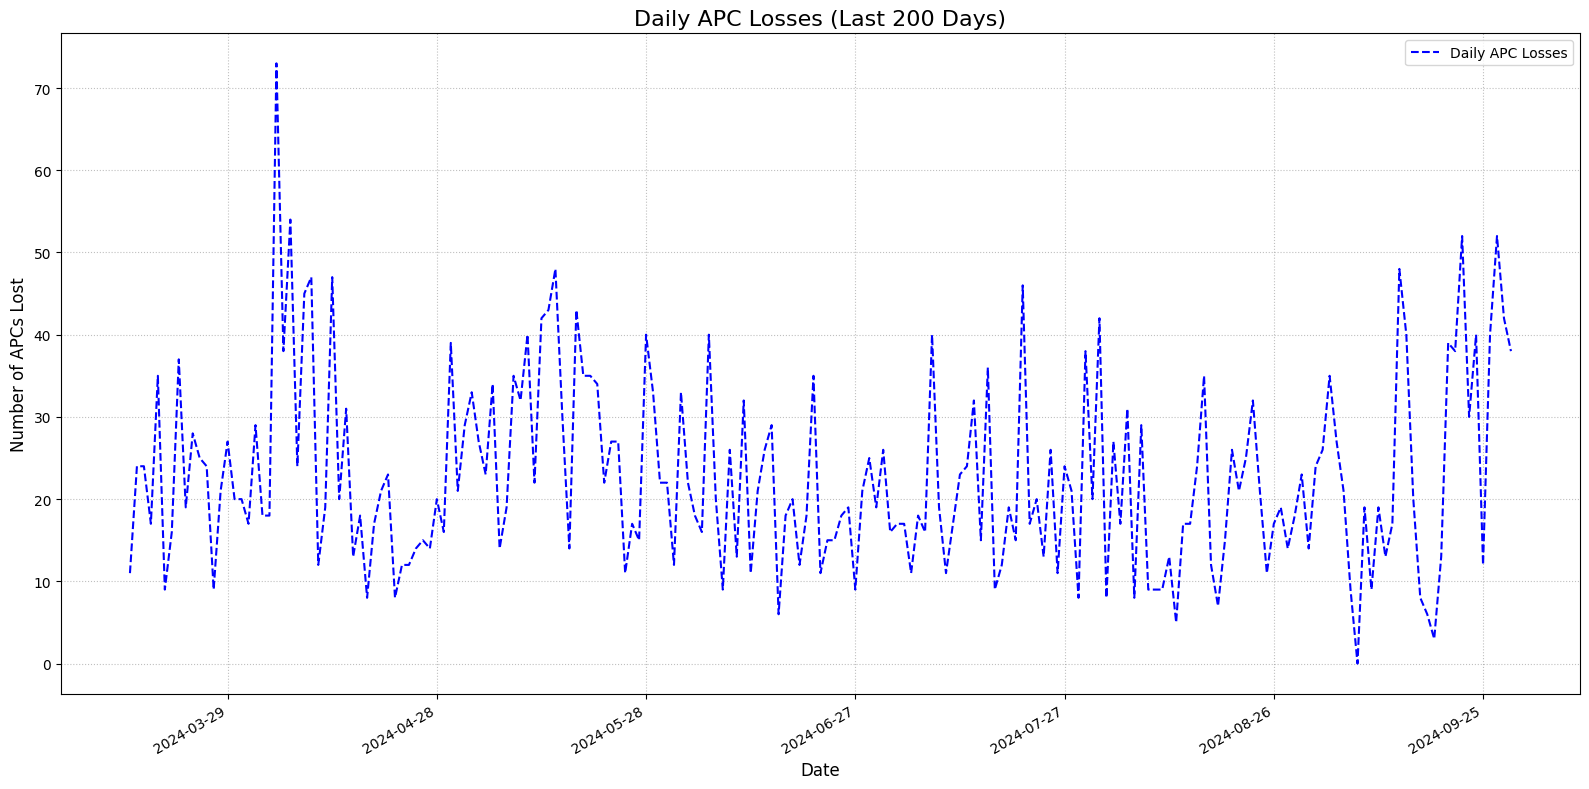

In [202]:
dates = get_column_values('russia_losses_equipment.csv', 'date')
apc_losses = get_column_values('russia_losses_equipment.csv', 'APC')

last_200_dates = dates[-200:]
last_200_losses = apc_losses[-200:]

daily_losses = get_daily_losses(last_200_losses)


plt.figure(figsize=(16, 8), dpi=100)
plt.plot(last_200_dates[1:], daily_losses, linestyle='--', color='blue', label='Daily APC Losses')


plt.title('Daily APC Losses (Last 200 Days)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of APCs Lost', fontsize=12)


plt.legend()


plt.grid(True, linestyle=':', color='gray', alpha=0.5)


plt.gcf().autofmt_xdate() 


start_date = np.datetime64('2024-03-29')
end_date = np.datetime64('2024-09-29')
tick_dates = np.arange(start_date, end_date + np.timedelta64(1, 'D'), np.timedelta64(30, 'D'))

plt.gca().set_xticks(tick_dates)
plt.gca().set_xticklabels([np.datetime_as_string(date, unit='D') for date in tick_dates])


plt.tight_layout()


plt.savefig('apc_losses_last_200_days_Skuratovets_KN222be.png', format='png', dpi=100)


plt.show()